# Using Spectral Fits to Calculate Fluxes

3ML provides a module to calculate the integral flux from a spectral fit and additionally uses the covariance matrix or posteror to calculate the error in the flux value for the integration range selected


In [1]:
%pylab inline

from threeML import *


Populating the interactive namespace from numpy and matplotlib

Did you try to import pygsl in the build directory?

Well, that does not work out of the box. If you want to do that, please
use
      python setup.py build_ext -i
to add the necessary extension module in the local pygsl/ directory!

Please read the README first! Any further questions or missing information
please post to pygsl-discuss@lists.sourceforge.net!

Configuration read from /Users/jburgess/.threeML/threeML_config.yml



WARNING RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility


WARNING RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176


WARNING RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176


WARNING RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176


WARNING RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incom

## Data setup

Using GRB 080916C as an example, we will fit two models to the time-integrated spectrum to demostrate the flux calculations capabilites.

In [4]:
# os.path.join is a way to generate system-independent
# paths (good for unix, windows, Mac...)

data_dir = os.path.join('gbm','bn080916009')

src_selection = "0.-70."


nai3 = FermiGBMTTELike('NAI3',
                        os.path.join(data_dir, "glg_tte_n3_bn080916009_v01.fit.gz"),
                        "-10-0,100-200",
                        src_selection,
                        rsp_file=os.path.join(data_dir, "glg_cspec_n3_bn080916009_v07.rsp"),
                        verbose=False)

bgo0 = FermiGBMTTELike('BGO0',
                       os.path.join(data_dir, "glg_tte_b0_bn080916009_v01.fit.gz"),
                       "-10-0,100-200",
                       src_selection,
                       rsp_file=os.path.join(data_dir, "glg_cspec_b0_bn080916009_v07.rsp"),
                       verbose=False)


nai3.set_active_measurements("8.0-30.0", "40.0-950.0")
bgo0.set_active_measurements("250-43000")

nai3.use_effective_area_correction()


Auto-determined polynomial order: 1


Auto-determined polynomial order: 1




## Model setup

We will fit two models: a Band function and a CPL+Blackbody


In [5]:
triggerName = 'bn080916009'
ra = 121.8
dec = -61.3


data_list = DataList(nai3,bgo0 )

band = Band()


GRB1 = PointSource( triggerName, ra, dec, spectral_shape=band )

model1 = Model( GRB1 )


pl_bb= Powerlaw() + Blackbody()


GRB2 = PointSource( triggerName, ra, dec, spectral_shape=pl_bb )

model2 = Model( GRB2 )




## Fitting

### MLE 

We fit both models using MLE

In [6]:
jl1 = JointLikelihood( model1, data_list, verbose=False )

res = jl1.fit()



jl2 = JointLikelihood( model2, data_list, verbose=False )

res = jl2.fit()


Best fit values:



#,Name,Best fit value,Unit
0,bn080916009.spectrum.main.Band.K,0.0119 +/- 0.0016,1 / (cm2 keV s)
1,bn080916009.spectrum.main.Band.alpha,-1.07 +/- 0.05,
2,bn080916009.spectrum.main.Band.xp,(8.0 +/- 2.7)e+02,keV
3,bn080916009.spectrum.main.Band.beta,-2.19 +/- 0.21,
4,cons_NAI3,1.18 +/- 0.09,



NOTE: errors on parameters are approximate. Use get_errors().


Correlation matrix:



1.00,0.82,-0.93,0.59,-0.91
0.82,1.00,-0.93,0.63,-0.57
-0.93,-0.93,1.00,-0.71,0.72
0.59,0.63,-0.71,1.00,-0.41
-0.91,-0.57,0.72,-0.41,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
total,2263.877123
NAI3,1078.650463
BGO0,1185.226660



WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: ove

Best fit values:




WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: overflow encountered in exp


WARNING RuntimeWarning: ove

#,Name,Best fit value,Unit
0,bn080916009.spectrum.main.composite.K_1,6.9 +/- 1.0,1 / (cm2 keV s)
1,bn080916009.spectrum.main.composite.index_1,-1.543 +/- 0.023,
2,bn080916009.spectrum.main.composite.K_2,(2.5 +/- 0.8)e-06,1 / (cm2 keV3 s)
3,bn080916009.spectrum.main.composite.kT_2,60 +/- 5,keV
4,cons_NAI3,1.14 +/- 0.11,



NOTE: errors on parameters are approximate. Use get_errors().


Correlation matrix:



1.00,-0.88,0.69,-0.51,-0.88
-0.88,1.00,-0.47,0.27,0.61
0.69,-0.47,1.00,-0.95,-0.86
-0.51,0.27,-0.95,1.00,0.72
-0.88,0.61,-0.86,0.72,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
total,2300.458539
NAI3,1090.364531
BGO0,1210.094008


### Flux caluclation

#### Total flux

The **JointLikelihood** objects are passed to the **SpectralFlux** class.
Then either **model_flux** or **component_flux** are called depending on the flux desired.

The astropy system of units is used to specfiy flux units and an error is raised if the user selects an improper unit. The integration range is specified and the unit for this range can be altered.



In [7]:
flux = SpectralFlux(jl1)
res = flux.model_flux(flux_unit='erg/(s cm2)', energy_unit='keV',ene_min=10,ene_max=40000)

res[['Source','Flux','Error']]

TypeError: _propagate_full() takes exactly 4 arguments (5 given)

A panadas DataFrame is returned with the sources (a fitting object can have multiple sources) flux, and flux error.

We can also change to photon fluxes by specifying the proper flux unit (here we changed to m^2). Here, the integration unit is also changed.

In [11]:
res = flux.model_flux(flux_unit='1/(s m2)', energy_unit='MeV',ene_min=.01,ene_max=4)

res[['Source','Flux','Error']]

,Source,Flux,Error
0,bn080916009,132500919.654 1 / (m2 s),27707634.6396 1 / (m2 s)


#### Components

If we want to look at component fluxes, we examine our second fit. 

We can first look at the total flux:


In [12]:
flux = SpectralFlux(jl2)
res = flux.model_flux(flux_unit='erg/(s cm2)', energy_unit='keV',ene_min=10,ene_max=40000)

res[['Source','Flux','Error']]

,Source,Flux,Error
0,bn080916009,3.49923136358e-06 erg / (cm2 s),2.69659414654e-07 erg / (cm2 s)


Then we can look at our component fluxes. The class automatically solves the error propagation equations to properly propagate the parameter errors into the components

In [13]:
res = flux.component_flux(flux_unit='erg/(s cm2)', energy_unit='keV',ene_min=10,ene_max=40000)

res['bn080916009'][['Component','Flux','Error']]

,Component,Flux,Error
0,Powerlaw,3.13655877759e-06 erg / (cm2 s),2.82430574963e-07 erg / (cm2 s)
1,Blackbody,3.62672585988e-07 erg / (cm2 s),2.23051827613e-08 erg / (cm2 s)


A dictionary of sources is return that contains pandas DataFrames listing the fluxes and errors of each componenet. 

**NOTE**: *With proper error propagation, the total error is not always the sqrt of the sum of component errors squared!*

### Bayesian fitting

Now we will look at the results when a Bayesian fit is performed. 

We set our priors and then sample:

In [47]:
pl_bb.K_1.prior = Log_uniform_prior(lower_bound = 1E-1, upper_bound = 1E2)
pl_bb.index_1.set_uninformative_prior(Uniform_prior)

pl_bb.K_2.prior = Log_uniform_prior(lower_bound = 1E-6, upper_bound = 1E-3)
pl_bb.kT_2.prior = Log_uniform_prior(lower_bound = 1E0, upper_bound = 1E4)



In [49]:
bayes = BayesianAnalysis(model2,data_list)
_=bayes.sample(50,100,1000)

Running burn-in of 100 samples...


Sampling...


Mean acceptance fraction: 0.5856


### Flux Calculation

#### Total Flux

Just as with MLE, we pass the **BayesianAnalysis** object to the **SpectralFlux** class.

Now the propagation of fluxes is done using the posterior of the analysis.

In [50]:
flux_mc = SpectralFlux(bayes)

In [75]:
res = flux_mc.model_flux(flux_unit='erg/(s cm2)', energy_unit='keV',ene_min=10,ene_max=40000)
res[['Source','Mean Flux', 'HPD Flux','Flux Distribution']]

,Source,Mean Flux,HPD Flux,Flux Distribution
0,bn080916009,3.47811818219e-06 erg / (cm2 s),"[2.93901300653e-06 erg / (cm2 s), 4.0225892137...","[3.18502881191e-06 erg / (cm2 s), 3.1563889052..."


Once again, a DataFrame is returned. This time, it contains the mean flux from the distribution, the specfied level (default is 0.05) credible regions and the flux distribution itself. 

One can plot the distribtuion:

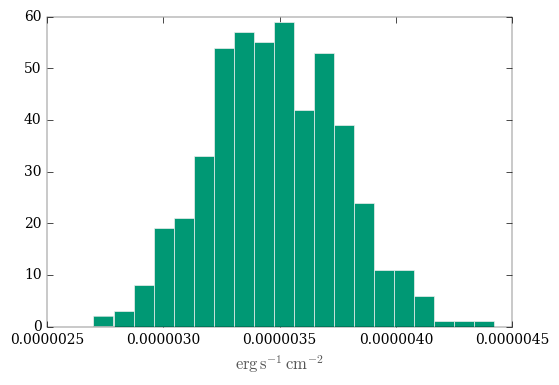

In [64]:
_=hist(res['Flux Distribution'][0],bins=20)

#### Components
We can also look at components as before. A dictionary of sources is returned, each containing Dataframes of the components information and distributions.


In [66]:
res_comp = flux_mc.component_flux(flux_unit='erg/(s cm2)', energy_unit='keV',ene_min=10,ene_max=40000)
res_comp['bn080916009']

,Component,Flux Distribution,HPD Flux,Mean Flux
0,Powerlaw,"[2.81482382675e-06 erg / (cm2 s), 2.7979502037...","[2.61053179535e-06 erg / (cm2 s), 3.7354590306...",3.11374392134e-06 erg / (cm2 s)
1,Blackbody,"[3.70204985159e-07 erg / (cm2 s), 3.5843870156...","[3.18125822531e-07 erg / (cm2 s), 4.0893129163...",3.64374260841e-07 erg / (cm2 s)


We can easily now visulaize the flux distribtuions from the individual components.

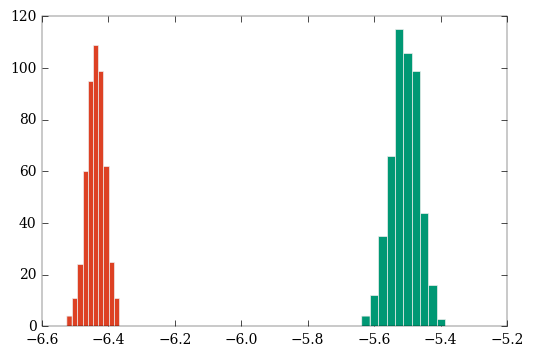

In [73]:
_=hist(log10(res_comp['bn080916009']['Flux Distribution'][0].value))
_=hist(log10(res_comp['bn080916009']['Flux Distribution'][1].value))